In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,357 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,920 kB]
Fetched 3,510 kB in 2s (1,657 kB/s)
Reading package lists... Do

In [ ]:
!ls /usr/lib/jvm



java-1.11.0-openjdk-amd64  java-11-openjdk-amd64  java-1.8.0-openjdk-amd64  java-8-openjdk-amd64


In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz


In [ ]:
!ls

master.csv  sample_data  spark-3.0.3-bin-hadoop3.2.tgz


In [ ]:
!du -sh spark-3.0.3-bin-hadoop3.2.tgz


215M	spark-3.0.3-bin-hadoop3.2.tgz


In [ ]:
!tar -xvzf spark-3.0.3-bin-hadoop3.2.tgz

spark-3.0.3-bin-hadoop3.2/
spark-3.0.3-bin-hadoop3.2/NOTICE
spark-3.0.3-bin-hadoop3.2/kubernetes/
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop3.2/jars/
spark-3.0.3-bin-hadoop3.2/jars/hive-

In [ ]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop3.2"

In [ ]:
!pip install pyspark==3.0.3
!pip install -q findspark
import findspark
findspark.init()
findspark.find()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.1/209.1 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.3-py2.py3-none-any.whl size=209435950 sha256=e611b7a23b8a41f5496254bc1e11b82658854fb9eb787cbd3065210b2413459e
  Stored in directory: /root/.cache/pip/wheels/40/50/14/79047c3c171b701e591d287b78a201214d9c8e0b93fef64458
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


'/content/spark-3.0.3-bin-hadoop3.2'

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import *
from pyspark.sql.functions import col, sum
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.clustering import KMeans, KMeansSummary
from pyspark.ml.clustering import BisectingKMeans, BisectingKMeansSummary
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
spark = SparkSession.builder.appName('SuicideRatesOverview').getOrCreate()
spark

In [ ]:
cores = spark._jsc.sc().getExecutorMemoryStatus().keySet().size()
cores

1

**Reading the Dataset**

In [ ]:
data = spark.read.csv('/content/master.csv', inferSchema=True, header=True)
data

DataFrame[country: string, year: int, sex: string, age: string, suicides_no: int, population: int, suicides/100k pop: double, country-year: string, HDI for year: double,  gdp_for_year ($) : string, gdp_per_capita ($): int, generation: string]

In [ ]:
data.show()

+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|country-year|HDI for year| gdp_for_year ($) |gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71| Albania1987|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19| Albania1987|        null|     2,156,624,900|               796|         Silent|
|Albania|1987|female|15-24 years|         14|    289700|             4.83| Albania1987|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|  75+ years|          1|     21800|             4

In [ ]:
data.toPandas()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
# data validation
data.columns

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [ ]:
data.head()

Row(country='Albania', year=1987, sex='male', age='15-24 years', suicides_no=21, population=312900, suicides/100k pop=6.71, country-year='Albania1987', HDI for year=None,  gdp_for_year ($) ='2,156,624,900', gdp_per_capita ($)=796, generation='Generation X')

In [ ]:
data.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- country-year: string (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)



In [ ]:
print(data.printSchema())
print("")
print(data.columns)
print("")
print(data.describe())

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- country-year: string (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)

None

['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']

DataFrame[summary: string, country: string, year: string, sex: string, age: string, suicides_no: string, population: string, suicides/100k pop: string, country-year: string, HDI for year: string,  gdp_for_year ($) : string, gdp_per_capita ($): string, generation: string]


In [ ]:
from pyspark.sql.types import StructField,StringType,IntegerType,StructType,DoubleType


In [ ]:
from struct import Struct
from pickle import TRUE
data_schema = [StructField("country", StringType(), True),\
               StructField("year", IntegerType(), True),\
               StructField("sex", StringType(), True),\
               StructField("age", StringType(), True),\
               StructField("suicide_no", IntegerType(), True),\
               StructField("population", IntegerType(), True),\
               StructField("suicides/100k pop", DoubleType(), True),\
               StructField("country-year", StringType(), True),\
               StructField("HDI for year", DoubleType(), True),\
               StructField("gdp_for_year ($)", StringType(), True),\
               StructField("gdp_per_capita ($)", IntegerType(), True),\
               StructField("generation", StringType(), True)]

In [ ]:
final_struc = StructType(fields=data_schema)
final_struc

StructType(List(StructField(country,StringType,true),StructField(year,IntegerType,true),StructField(sex,StringType,true),StructField(age,StringType,true),StructField(suicide_no,IntegerType,true),StructField(population,IntegerType,true),StructField(suicides/100k pop,DoubleType,true),StructField(country-year,StringType,true),StructField(HDI for year,DoubleType,true),StructField(gdp_for_year ($),StringType,true),StructField(gdp_per_capita ($),IntegerType,true),StructField(generation,StringType,true)))

In [ ]:
data = spark.read.csv('/content/master.csv', schema=final_struc)
data

DataFrame[country: string, year: int, sex: string, age: string, suicide_no: int, population: int, suicides/100k pop: double, country-year: string, HDI for year: double, gdp_for_year ($): string, gdp_per_capita ($): int, generation: string]

In [ ]:
data.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicide_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- country-year: string (nullable = true)
 |-- HDI for year: double (nullable = true)
 |-- gdp_for_year ($): string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)



In [ ]:
print('Number of rows:', data.count())
print('Number of columns:', len(data.columns))

Number of rows: 27821
Number of columns: 12


In [ ]:
data.columns

['country',
 'year',
 'sex',
 'age',
 'suicide_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 'gdp_for_year ($)',
 'gdp_per_capita ($)',
 'generation']

In [ ]:
data.describe().show()

+-------+-------+------------------+------+-----------+------------------+------------------+------------------+------------+-------------------+------------------+------------------+----------+
|summary|country|              year|   sex|        age|        suicide_no|        population| suicides/100k pop|country-year|       HDI for year|  gdp_for_year ($)|gdp_per_capita ($)|generation|
+-------+-------+------------------+------+-----------+------------------+------------------+------------------+------------+-------------------+------------------+------------------+----------+
|  count|  27821|             27820| 27821|      27821|             27820|             27820|             27820|       27821|               8364|             27821|             27820|     27821|
|   mean|   null|2001.2583752695903|  null|       null|242.57440690150972|1844793.6173975556|12.816097411933894|        null| 0.7766011477761785|              null|16866.464414090584|      null|
| stddev|   null| 8.46905

In [ ]:
# Finding the missing values
# Check for null values in all columns
from pyspark.sql.functions import col, isnan, when, count

null_counts = data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns])

# Show the counts of null values in each column
null_counts.show()

+-------+----+---+---+----------+----------+-----------------+------------+------------+----------------+------------------+----------+
|country|year|sex|age|suicide_no|population|suicides/100k pop|country-year|HDI for year|gdp_for_year ($)|gdp_per_capita ($)|generation|
+-------+----+---+---+----------+----------+-----------------+------------+------------+----------------+------------------+----------+
|      0|   1|  0|  0|         1|         1|                1|           0|       19457|               0|                 1|         0|
+-------+----+---+---+----------+----------+-----------------+------------+------------+----------------+------------------+----------+



In [ ]:
data_fill = data.fillna(0)
data_fill.show()

+-------+----+------+-----------+----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|country|year|   sex|        age|suicide_no|population|suicides/100k pop|country-year|HDI for year|  gdp_for_year ($)|gdp_per_capita ($)|     generation|
+-------+----+------+-----------+----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|country|   0|   sex|        age|         0|         0|              0.0|country-year|         0.0| gdp_for_year ($) |                 0|     generation|
|Albania|1987|  male|15-24 years|        21|    312900|             6.71| Albania1987|         0.0|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|35-54 years|        16|    308000|             5.19| Albania1987|         0.0|     2,156,624,900|               796|         Silent|
|Albania|1987|female|15-24 years|        14|    289700|             4.83| Al

In [ ]:
data_fill.describe().show()

+-------+-------+------------------+------+-----------+------------------+------------------+-----------------+------------+-------------------+------------------+------------------+----------+
|summary|country|              year|   sex|        age|        suicide_no|        population|suicides/100k pop|country-year|       HDI for year|  gdp_for_year ($)|gdp_per_capita ($)|generation|
+-------+-------+------------------+------+-----------+------------------+------------------+-----------------+------------+-------------------+------------------+------------------+----------+
|  count|  27821|             27821| 27821|      27821|             27821|             27821|            27821|       27821|              27821|             27821|             27821|     27821|
|   mean|   null|2001.1864418964092|  null|       null|242.56568778979909|1844727.3080047446|12.81563674921825|        null| 0.2334744257934638|              null|16865.858164695732|      null|
| stddev|   null|14.6860335138

In [ ]:
data_fill.groupBy("country").count().show()

+-----------------+-----+
|          country|count|
+-----------------+-----+
|         Paraguay|  324|
|       Cabo Verde|   12|
|           Sweden|  358|
|         Kiribati|  132|
|Republic of Korea|  372|
|           Guyana|  300|
|      Philippines|  180|
|        Singapore|  372|
|             Fiji|  132|
|           Turkey|   84|
|          Germany|  312|
|         Maldives|  120|
|           France|  360|
|           Greece|  372|
|        Sri Lanka|  132|
|         Dominica|   12|
|         Slovakia|  264|
|            Macau|   12|
|        Argentina|  372|
|          Belgium|  372|
+-----------------+-----+
only showing top 20 rows



In [ ]:
data_fill.groupBy("country").mean("suicide_no").show()

+-----------------+-------------------+
|          country|    avg(suicide_no)|
+-----------------+-------------------+
|         Paraguay| 14.762345679012345|
|       Cabo Verde|                3.5|
|           Sweden| 105.57262569832402|
|         Kiribati| 0.4015151515151515|
|Republic of Korea|  703.5752688172043|
|           Guyana|              11.42|
|      Philippines|              118.5|
|        Singapore| 27.120967741935484|
|             Fiji|  2.303030303030303|
|           Turkey| 120.60714285714286|
|          Germany|  933.5320512820513|
|         Maldives|0.16666666666666666|
|           France|  914.2416666666667|
|           Greece|  33.24731182795699|
|        Sri Lanka| 421.52272727272725|
|         Dominica|                0.0|
|         Slovakia|  50.89772727272727|
|            Macau|               2.25|
|        Argentina|  221.0188172043011|
|          Belgium| 168.71236559139786|
+-----------------+-------------------+
only showing top 20 rows



In [ ]:
data_fill.select("suicide_no", "suicides/100k pop", "HDI for year", "gdp_per_capita ($)").summary("count","min","25%","50%","75%","max").show()

+-------+----------+-----------------+------------+------------------+
|summary|suicide_no|suicides/100k pop|HDI for year|gdp_per_capita ($)|
+-------+----------+-----------------+------------+------------------+
|  count|     27821|            27821|       27821|             27821|
|    min|         0|              0.0|         0.0|                 0|
|    25%|         3|             0.92|         0.0|              3447|
|    50%|        25|             5.99|         0.0|              9372|
|    75%|       131|            16.61|       0.677|             24874|
|    max|     22338|           224.97|       0.944|            126352|
+-------+----------+-----------------+------------+------------------+



In [ ]:
# converting categorical variables into numerical variables using the String Indexer
# create a list of the categorical columns
cat_cols = ["country", "sex", "age","gdp_for_year ($)", "country-year", "generation"]

# instantiate string index for the categorical variables
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index").fit(data_fill)for col in cat_cols]

# apply transformation to dataframe
indexed_data = data_fill
for indexer in indexers:
  indexed_data = indexer.transform(indexed_data)

indexed_data.show()


+-------+----+------+-----------+----------+----------+-----------------+------------+------------+------------------+------------------+---------------+-------------+---------+---------+----------------------+------------------+----------------+
|country|year|   sex|        age|suicide_no|population|suicides/100k pop|country-year|HDI for year|  gdp_for_year ($)|gdp_per_capita ($)|     generation|country_index|sex_index|age_index|gdp_for_year ($)_index|country-year_index|generation_index|
+-------+----+------+-----------+----------+----------+-----------------+------------+------------+------------------+------------------+---------------+-------------+---------+---------+----------------------+------------------+----------------+
|country|   0|   sex|        age|         0|         0|              0.0|country-year|         0.0| gdp_for_year ($) |                 0|     generation|        101.0|      2.0|      6.0|                2321.0|            2321.0|             6.0|
|Albania|198

In [ ]:
data_ML = indexed_data.drop("country","sex","age","country-year","gdp_for_year ($)","generation")
data_ML.show()

+----+----------+----------+-----------------+------------+------------------+-------------+---------+---------+----------------------+------------------+----------------+
|year|suicide_no|population|suicides/100k pop|HDI for year|gdp_per_capita ($)|country_index|sex_index|age_index|gdp_for_year ($)_index|country-year_index|generation_index|
+----+----------+----------+-----------------+------------+------------------+-------------+---------+---------+----------------------+------------------+----------------+
|   0|         0|         0|              0.0|         0.0|                 0|        101.0|      2.0|      6.0|                2321.0|            2321.0|             6.0|
|1987|        21|    312900|             6.71|         0.0|               796|         63.0|      1.0|      0.0|                 718.0|               0.0|             0.0|
|1987|        16|    308000|             5.19|         0.0|               796|         63.0|      1.0|      2.0|                 718.0|     

**APPLYING PYSPARK MACHINE LEARNING CLUSTERING TECHNIQUE ON SUICIDE RATE OVERVIEW**

In [ ]:
# creating a vector assembler for the dataset
input_columns = data_ML.columns

# create the vector
vecAssembler = VectorAssembler(inputCols=input_columns, outputCol="features")
data_ML_KMeans = vecAssembler.transform(data_ML)
data_ML_KMeans.show()


+----+----------+----------+-----------------+------------+------------------+-------------+---------+---------+----------------------+------------------+----------------+--------------------+
|year|suicide_no|population|suicides/100k pop|HDI for year|gdp_per_capita ($)|country_index|sex_index|age_index|gdp_for_year ($)_index|country-year_index|generation_index|            features|
+----+----------+----------+-----------------+------------+------------------+-------------+---------+---------+----------------------+------------------+----------------+--------------------+
|   0|         0|         0|              0.0|         0.0|                 0|        101.0|      2.0|      6.0|                2321.0|            2321.0|             6.0|(12,[6,7,8,9,10,1...|
|1987|        21|    312900|             6.71|         0.0|               796|         63.0|      1.0|      0.0|                 718.0|               0.0|             0.0|[1987.0,21.0,3129...|
|1987|        16|    308000|       

In [ ]:
# set a max for the number of clusters needed
kmax = 50
# creating an array filled with zeros for the amount of K
kmcost = np.zeros(kmax)
for k in range(2,kmax):

    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    # fit to dataset
    model = kmeans.fit(data_ML_KMeans)

    # compute the "cost" (sum of squared distances) between the input points and their corresponding cluster centers
    kmcost[k] = model.summary.trainingCost

print(kmcost[2:kmax])



[1.39622549e+17 6.62125898e+16 4.21938821e+16 2.12896404e+16
 1.58403686e+16 1.57054532e+16 8.94102326e+15 7.58244111e+15
 6.47368777e+15 4.87440237e+15 5.37521943e+15 3.59935106e+15
 3.13622445e+15 2.67344153e+15 2.41156712e+15 2.10730941e+15
 1.87987743e+15 1.60976510e+15 1.44172013e+15 1.37960823e+15
 1.24277504e+15 1.07881394e+15 1.05548992e+15 9.72595969e+14
 9.23818234e+14 7.97198812e+14 8.42038758e+14 7.57660055e+14
 7.31763205e+14 6.70993933e+14 5.91274758e+14 5.89165167e+14
 5.66911149e+14 4.88703891e+14 4.83151299e+14 4.47140059e+14
 3.97887137e+14 4.33109131e+14 3.93315773e+14 3.77676880e+14
 4.02373420e+14 3.34182843e+14 3.23343803e+14 2.90689709e+14
 3.01363112e+14 2.93775952e+14 2.69940569e+14 2.65997261e+14]


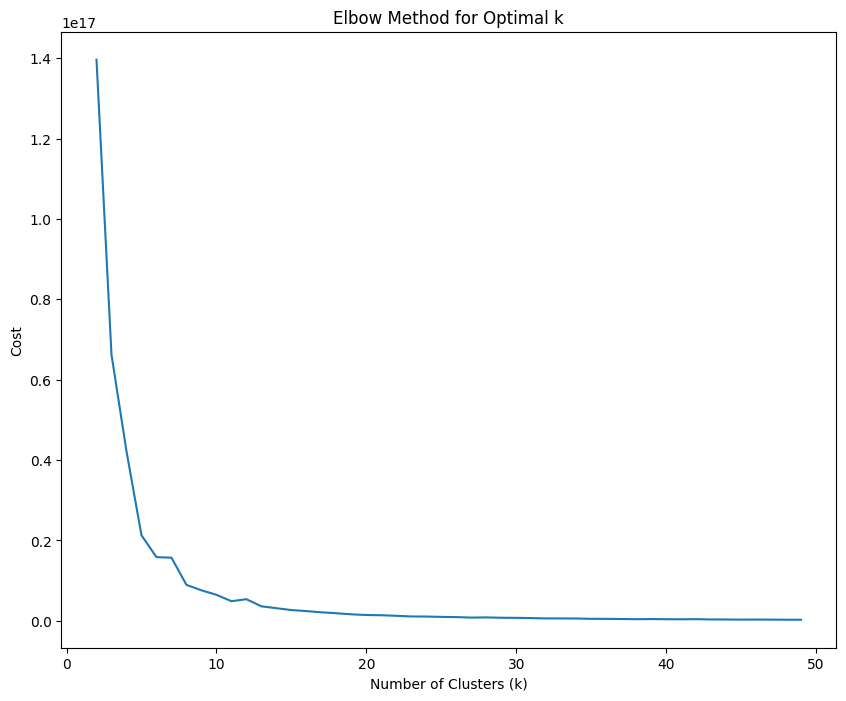

In [ ]:
#Plot the cost vs number of Clusters
fig, ax = plt.subplots(1,1, figsize =(10,8))
plt.plot(range(2,kmax), kmcost[2:kmax])
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
## Fit the final model
k = 8
kmeans = KMeans().setK(k).setSeed(3).setFeaturesCol("features")
model = kmeans.fit(data_ML_KMeans)

predictions = model.transform(data_ML_KMeans)

evaluator = ClusteringEvaluator()

silhouette_score = evaluator.evaluate(predictions)
print("Silhouette Score = " + str(silhouette_score))

Silhouette Score = 0.828731519380173


In [ ]:
centers = model.clusterCenters()
for centers in centers:
    print(centers)

[2.00120045e+03 3.90519392e+01 2.89551325e+05 1.27673874e+01
 2.30898575e-01 1.67235023e+04 4.41915749e+01 5.06133528e-01
 2.57738686e+00 1.18048828e+03 1.11459461e+03 1.86730699e+00]
[2.00012407e+03 2.01888834e+03 1.65049763e+07 1.21981141e+01
 2.31029777e-01 1.77346501e+04 1.34987593e+01 4.66501241e-01
 2.30521092e+00 1.36850124e+03 9.35312655e+02 1.53101737e+00]
[2.00134031e+03 1.33804550e+03 9.43896059e+06 1.39184167e+01
 2.10956324e-01 1.85409636e+04 3.06260237e+01 4.93175614e-01
 2.14649682e+00 1.06640673e+03 1.40346588e+03 1.71883530e+00]
[2.00185827e+03 3.38829528e+03 2.09315341e+07 1.64262205e+01
 2.20854331e-01 3.07821181e+04 2.51968504e+01 4.96062992e-01
 2.04330709e+00 1.03024016e+03 1.96207087e+03 2.00787402e+00]
[2.00109843e+03 4.99623125e+02 4.62642213e+06 1.05913502e+01
 2.38702891e-01 1.69865145e+04 3.06578851e+01 4.95792170e-01
 2.25137212e+00 1.08186791e+03 1.41212989e+03 1.73252836e+00]
[2.00114475e+03 2.46275778e+02 1.85118925e+06 1.40278276e+01
 2.46121969e-01 1.5

In [ ]:
predictions.toPandas()


,year,suicide_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),country_index,sex_index,age_index,gdp_for_year ($)_index,country-year_index,generation_index,features,prediction
0,0,0,0,0.00,0.000,0,101.0,2.0,6.0,2321.0,2321.0,6.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 101.0, 2.0, 6.0...",0
1,1987,21,312900,6.71,0.000,796,63.0,1.0,0.0,718.0,0.0,0.0,"[1987.0, 21.0, 312900.0, 6.71, 0.0, 796.0, 63....",0
2,1987,16,308000,5.19,0.000,796,63.0,1.0,2.0,718.0,0.0,1.0,"[1987.0, 16.0, 308000.0, 5.19, 0.0, 796.0, 63....",0
3,1987,14,289700,4.83,0.000,796,63.0,0.0,0.0,718.0,0.0,0.0,"[1987.0, 14.0, 289700.0, 4.83, 0.0, 796.0, 63....",0
4,1987,1,21800,4.59,0.000,796,63.0,1.0,4.0,718.0,0.0,4.0,"[1987.0, 1.0, 21800.0, 4.59, 0.0, 796.0, 63.0,...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27816,2014,107,3620833,2.96,0.675,2309,67.0,0.0,2.0,1921.0,2304.0,0.0,"[2014.0, 107.0, 3620833.0, 2.96, 0.675, 2309.0...",4
27817,2014,9,348465,2.58,0.675,2309,67.0,0.0,4.0,1921.0,2304.0,1.0,"[2014.0, 9.0, 348465.0, 2.58, 0.675, 2309.0, 6...",0
27818,2014,60,2762158,2.17,0.675,2309,67.0,1.0,5.0,1921.0,2304.0,5.0,"[2014.0, 60.0, 2762158.0, 2.17, 0.675, 2309.0,...",5
27819,2014,44,2631600,1.67,0.675,2309,67.0,0.0,5.0,1921.0,2304.0,5.0,"[2014.0, 44.0, 2631600.0, 1.67, 0.675, 2309.0,...",5


In [ ]:
predictions.groupBy("prediction").agg(min(predictions.suicide_no), max(predictions.suicide_no)).show()

+----------+---------------+---------------+
|prediction|min(suicide_no)|max(suicide_no)|
+----------+---------------+---------------+
|         1|             25|          12517|
|         6|            768|           9068|
|         3|             50|          22338|
|         5|              0|           2574|
|         4|              0|           5203|
|         7|           2454|          11767|
|         2|              0|          11431|
|         0|              0|           1329|
+----------+---------------+---------------+



In [ ]:
## BisectingKMeans
kmax = 50
bkmcost = np.zeros(kmax)
for k in range(2, kmax):
    bkmeans = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model_bk = bkmeans.fit(data_ML_KMeans)
    bkmcost[k] = model_bk.summary.trainingCost

print(bkmcost[2:kmax])



[1.39622549e+17 9.00117462e+16 4.36335161e+16 3.90352769e+16
 3.38584562e+16 3.12084598e+16 1.03795662e+16 9.61057146e+15
 9.09830204e+15 8.30874170e+15 7.64817292e+15 7.24580049e+15
 4.83578750e+15 4.24718625e+15 2.79166340e+15 2.67300901e+15
 2.57700047e+15 2.49608220e+15 2.37609301e+15 2.27047051e+15
 2.22138006e+15 2.13798395e+15 2.04906357e+15 2.00475709e+15
 1.79099778e+15 1.73905339e+15 1.68084558e+15 9.39864586e+14
 8.91829887e+14 8.00288842e+14 7.03762217e+14 6.94233534e+14
 6.86233083e+14 6.74118430e+14 6.59455068e+14 6.45682909e+14
 6.36922667e+14 6.21646386e+14 6.08287705e+14 6.01421142e+14
 5.87293440e+14 5.70287860e+14 5.64867650e+14 5.57186565e+14
 5.48716038e+14 5.39927677e+14 5.26636150e+14 4.84641217e+14]


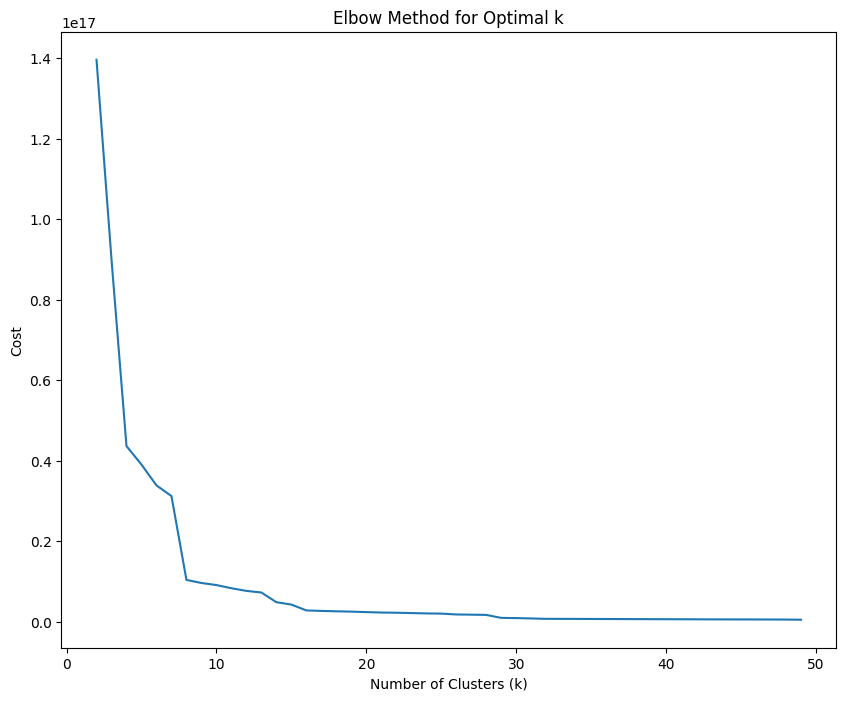

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,kmax),bkmcost[2:kmax])
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
# Fit the final model
k = 8
bkmeans = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = bkmeans.fit(data_ML_KMeans)

predictions = model.transform(data_ML_KMeans)

evaluator = ClusteringEvaluator()

silhouette_bkmeans_score = evaluator.evaluate(predictions)
print("Silhouette_bkmeans_score = " + str(silhouette_bkmeans_score))

Silhouette_bkmeans_score = 0.8220719149339413


In [ ]:
predictions.groupBy("prediction").agg(min(predictions.suicide_no), max(predictions.suicide_no)).show()

+----------+---------------+---------------+
|prediction|min(suicide_no)|max(suicide_no)|
+----------+---------------+---------------+
|         1|              0|           1712|
|         6|             25|          22338|
|         3|              0|           5203|
|         5|             35|          11152|
|         4|              0|          11431|
|         7|           1875|          11767|
|         2|              0|           3821|
|         0|              0|           1276|
+----------+---------------+---------------+

